Source code for networks: \\
Tutorial - https://notebook.community/mdeff/ntds_2017/demos/04_networkx \\
Library for networks - https://networkx.org/documentation/stable/index.html \\
Visualization - https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259

In [2]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.7 MB/s eta 0:00:00


In [4]:
from pyvis.network import Network
from IPython.core.display import display, HTML

## Poisson network

In [112]:
er=nx.erdos_renyi_graph(50,0.1)

In [113]:
er_adj = nx.adjacency_matrix(er,range(20))
er_adj = er_adj.todense()
er_adj

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0,

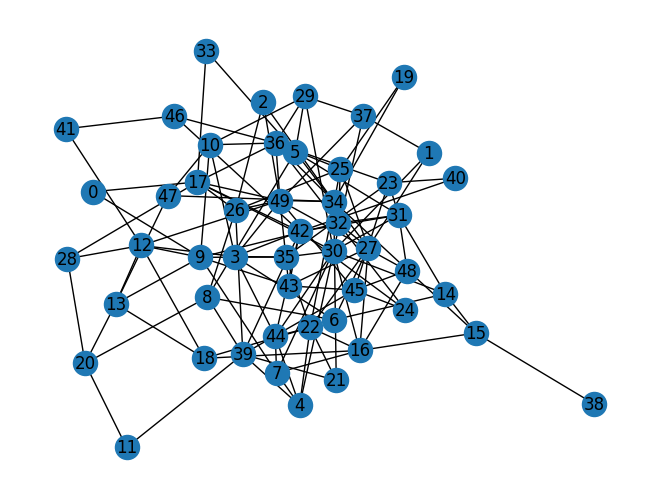

In [114]:
nx.draw(er, with_labels=True)

In [115]:
net = Network(notebook=True, cdn_resources='in_line')
net.from_nx(er)
net.show("try.html")
display(HTML('try.html'))

try.html


(array([5., 0., 0., 7., 0., 0., 5., 0., 0., 3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

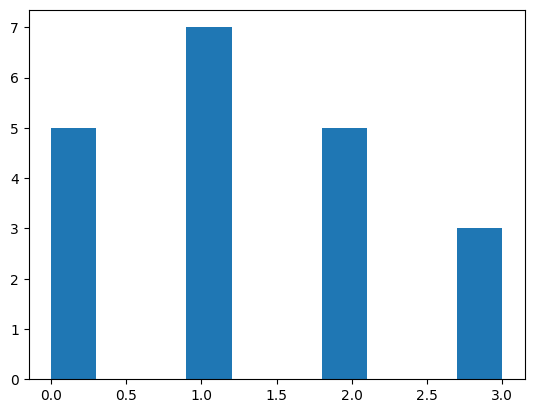

In [9]:
degrees = [er.degree(n) for n in er.nodes()]
plt.hist(degrees)

In [10]:
print(f'Average degree of the network is {np.average(degrees)}')

Average degree of the network is 1.3


In [11]:
n_nodes = len(er.nodes)
centrality_degree = []
for node in er.nodes():
  centrality_degree.append(er.degree(node)/(n_nodes-1))

print(f'Average degree centrality is {round(np.average(centrality_degree),2)}')

Average degree centrality is 0.07


In [12]:
print(f'Clustering coefficient is {round(nx.average_clustering(er),3)}')

Clustering coefficient is 0.0


In [13]:
print(f'Average Geodesic is {round(nx.average_shortest_path_length(er),3)}')

NetworkXError: ignored

In [14]:
!python --version

Python 3.9.16


In [15]:
results = {}
distribution = [0.1, 0.3, 0.6]
nodes = [10, 100, 1000]
types = []
avg_cen_degree = []
avgdegree = []
clustering_c = []
avggeodesic = []

for d in distribution:
  for n in nodes:
    er=nx.erdos_renyi_graph(n,d)
  #   n_nodes = len(er.nodes)
  #   centrality_degree = []
  #   for node in er.nodes():
  #     centrality_degree.append(er.degree(node)/(n_nodes-1))
    types.append(f'Poisson {n} nodes, {d} probability')
  #  avg_cen_degree.append(np.average(centrality_degree))
    avgdegree.append(np.average([er.degree(i) for i in er.nodes()]))
    clustering_c.append(nx.average_clustering(er))
    try:
      avggeodesic.append(nx.average_shortest_path_length(er))
    except:
      avggeodesic.append('Graph is not connected')

results['Network_type'] = types
results['AVG(Degree)'] = avgdegree
results['Clustering_Coef'] = clustering_c
results['AVG(Geodesic)'] = avggeodesic
#results['Degree_centrality'] = avg_cen_degree
pd.DataFrame.from_dict(results)

,Network_type,AVG(Degree),Clustering_Coef,AVG(Geodesic)
0,"Poisson 10 nodes, 0.1 probability",0.800,0.000000,Graph is not connected
1,"Poisson 100 nodes, 0.1 probability",9.780,0.099881,2.248889
2,"Poisson 1000 nodes, 0.1 probability",100.206,0.100672,1.899714
3,"Poisson 10 nodes, 0.3 probability",4.200,0.450000,1.6
4,"Poisson 100 nodes, 0.3 probability",29.040,0.293777,1.706667
5,"Poisson 1000 nodes, 0.3 probability",299.024,0.299273,1.700677
6,"Poisson 10 nodes, 0.6 probability",5.000,0.654762,1.466667
7,"Poisson 100 nodes, 0.6 probability",59.860,0.604160,1.395354
8,"Poisson 1000 nodes, 0.6 probability",599.466,0.600108,1.399934


## Barabasi-Albert network:

In [16]:
net_ba = Network(notebook=True, cdn_resources='in_line')
ba=nx.barabasi_albert_graph(100,2)
net_ba.from_nx(ba)
net_ba.show("ba.html")
display(HTML('ba.html'))

ba.html


In [17]:
path = dict(nx.shortest_path_length(ba))


In [18]:
path[5][20]

3

In [19]:
nodes = [10, 50, 100, 200, 1000]

for n in nodes:
  ba=nx.barabasi_albert_graph(n,2)
  types.append(f'Barabasi-Albert {n} nodes')
  avgdegree.append(np.average([ba.degree(i) for i in ba.nodes()]))
  clustering_c.append(nx.average_clustering(ba))
  try:
    avggeodesic.append(nx.average_shortest_path_length(ba))
  except:
    avggeodesic.append('Graph is not connected')

results['Network_type'] = types
results['AVG(Degree)'] = avgdegree
results['Clustering_Coef'] = clustering_c
results['AVG(Geodesic)'] = avggeodesic
pd.DataFrame.from_dict(results)

,Network_type,AVG(Degree),Clustering_Coef,AVG(Geodesic)
0,"Poisson 10 nodes, 0.1 probability",0.800,0.000000,Graph is not connected
1,"Poisson 100 nodes, 0.1 probability",9.780,0.099881,2.248889
2,"Poisson 1000 nodes, 0.1 probability",100.206,0.100672,1.899714
3,"Poisson 10 nodes, 0.3 probability",4.200,0.450000,1.6
4,"Poisson 100 nodes, 0.3 probability",29.040,0.293777,1.706667
5,"Poisson 1000 nodes, 0.3 probability",299.024,0.299273,1.700677
6,"Poisson 10 nodes, 0.6 probability",5.000,0.654762,1.466667
7,"Poisson 100 nodes, 0.6 probability",59.860,0.604160,1.395354
8,"Poisson 1000 nodes, 0.6 probability",599.466,0.600108,1.399934
9,Barabasi-Albert 10 nodes,3.200,0.453810,1.755556


## Watts-Strogatz graph:

In [20]:
net_ws = Network(notebook=True, cdn_resources='in_line')
ws=nx.watts_strogatz_graph(100,6,0.1)
net_ws.from_nx(ws)
net_ws.show("ws.html")
display(HTML('ws.html'))

ws.html


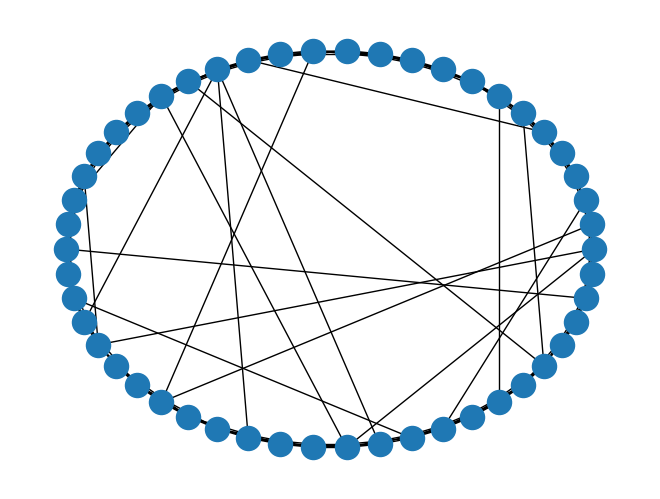

In [21]:
ws=nx.watts_strogatz_graph(50,6,0.1)
nx.draw_circular(ws)

In [22]:
nx.average_shortest_path_length(ws)

2.737142857142857

In [23]:
nodes = [10, 100, 1000]
cluster_ = [4,8]
proba = [0.1, 0.3, 0.6]

for n in nodes:
  for c in cluster_:
    for p in proba:
      ws=nx.watts_strogatz_graph(n,c,p)
      types.append(f'Watts-Strogatz {n} nodes, {c} nns, {p} pr')
      avgdegree.append(np.average([ws.degree(i) for i in ws.nodes()]))
      clustering_c.append(nx.average_clustering(ws))
      try:
        avggeodesic.append(nx.average_shortest_path_length(ws))
      except:
        avggeodesic.append('Graph is not connected')


results['Network_type'] = types
results['AVG(Degree)'] = avgdegree
results['Clustering_Coef'] = clustering_c
results['AVG(Geodesic)'] = avggeodesic
pd.DataFrame.from_dict(results)

,Network_type,AVG(Degree),Clustering_Coef,AVG(Geodesic)
0,"Poisson 10 nodes, 0.1 probability",0.800,0.000000,Graph is not connected
1,"Poisson 100 nodes, 0.1 probability",9.780,0.099881,2.248889
2,"Poisson 1000 nodes, 0.1 probability",100.206,0.100672,1.899714
3,"Poisson 10 nodes, 0.3 probability",4.200,0.450000,1.6
4,"Poisson 100 nodes, 0.3 probability",29.040,0.293777,1.706667
5,"Poisson 1000 nodes, 0.3 probability",299.024,0.299273,1.700677
6,"Poisson 10 nodes, 0.6 probability",5.000,0.654762,1.466667
7,"Poisson 100 nodes, 0.6 probability",59.860,0.604160,1.395354
8,"Poisson 1000 nodes, 0.6 probability",599.466,0.600108,1.399934
9,Barabasi-Albert 10 nodes,3.200,0.453810,1.755556


In [24]:
results_ = pd.DataFrame.from_dict(results)

In [25]:
pd.DataFrame.from_dict(results).to_excel('Networks_metrics.xlsx')

## Experiment

In [ ]:
# !pip install ipywidgets 
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [26]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

We first identify starting points 10% of n  and end point at random

In [27]:
import random

In [60]:
n=10000
er=nx.erdos_renyi_graph(n,0.05)
ba=nx.barabasi_albert_graph(n,2)
ws=nx.watts_strogatz_graph(n,4,0.1)
randomlist_er = random.sample(range(0, n-1), int(n*0.1))
randomlist_ba = random.sample(range(0, n-1), int(n*0.1))
randomlist_ws = random.sample(range(0, n-1), int(n*0.1))
end_er = randomlist_er.pop()
end_ba = randomlist_ba.pop()
end_ws = randomlist_ws.pop()
print(f"Ids of starting nodes for Possion \n{randomlist_er}, \nId of the destination node {end_er}")
print(f"Ids of starting nodes for Barabasi-Albeit \n{randomlist_ba}, \nId of the destination node {end_ba}")
print(f"Ids of starting nodes for Watts-Strogatz \n{randomlist_ws}, \nId of the destination node {end_ws}")

Ids of starting nodes for Possion 
[8730, 8829, 2409, 6941, 9477, 5309, 8170, 455, 3682, 2217, 3698, 957, 6250, 5601, 4079, 4839, 7986, 1730, 3146, 2033, 6261, 1253, 1142, 5237, 4133, 239, 2958, 1661, 1821, 1875, 9128, 5965, 3005, 969, 4222, 2219, 1028, 6952, 3799, 2300, 5029, 2737, 6965, 1793, 7352, 3669, 2434, 5120, 2251, 3246, 2570, 8947, 1111, 3781, 4811, 8592, 6253, 3914, 6323, 8260, 8717, 4744, 9864, 5515, 9203, 7158, 3294, 5597, 8978, 5105, 6590, 4548, 3178, 2186, 9756, 2481, 3786, 9689, 4099, 4095, 5167, 4850, 6661, 3301, 9141, 8526, 312, 2277, 858, 3150, 8247, 1436, 5244, 1329, 1979, 2386, 4199, 73, 9038, 9179, 6076, 927, 1499, 6384, 4682, 499, 4072, 4127, 4814, 5275, 6718, 2524, 6854, 8889, 7914, 7908, 8047, 7218, 2892, 2836, 8960, 630, 6457, 884, 7642, 1117, 6265, 4397, 4732, 8119, 3331, 5063, 3237, 6739, 5192, 9577, 818, 8557, 1828, 9265, 6821, 8025, 834, 6820, 2868, 3420, 3444, 6010, 9316, 6687, 7375, 9336, 7254, 1645, 6141, 3385, 3307, 8616, 5311, 14, 8481, 4275, 3676, 28

Case 1 \\
Perfect information \\
Culculate direct geodesic that should tend to average for the network

In [61]:
results = {}
for randomlist, end, name, er in zip([randomlist_er,randomlist_ba,randomlist_ws],[end_er,end_ba,end_ws],['Poisson','Barabasi-Albeit','Watts-Strogatz'], [er,ba,ws]):
  path = 0
  finished_full = []
  for i in tqdm(randomlist):
    finished_full.append(nx.shortest_path(er, source=i, target=end))
    path+= nx.shortest_path_length(er, source=i, target=end)
  results['Case_1_'+name+'_paths'] = finished_full
  results['Case_1_'+name+'_length'] = path/len(randomlist)
  print(f'Average path length for chosen nodes in {name} is {path/len(randomlist)}')

  0%|          | 0/999 [00:00<?, ?it/s]

Average path length for chosen nodes in Poisson is 1.951951951951952


  0%|          | 0/999 [00:00<?, ?it/s]

Average path length for chosen nodes in Barabasi-Albeit is 5.328328328328328


  0%|          | 0/999 [00:00<?, ?it/s]

Average path length for chosen nodes in Watts-Strogatz is 13.222222222222221


Case 2 \\
No information \\
Decision for information passage answers two rules \\
1. Random rounded uniformly distributed choice
2. No loops

In [62]:
def choose_next_random(options, visited):
  options = [x for x in options if x not in set(visited)]
  if len(options)==0:
    return -1
  tmp = int(np.random.uniform(0,len(options),1))
  return options[tmp]

In [63]:
for randomlist, end, name, er in zip([randomlist_er,randomlist_ba,randomlist_ws],[end_er,end_ba,end_ws],['Poisson','Barabasi-Albeit','Watts-Strogatz'], [er,ba,ws]):
  print(randomlist,'\n', end,'\n', name,'\n', er)
  paths = []
  for i in tqdm(randomlist):
    visited = []
    while (i != end) and (i !=-1):
      visited.append(i)
      i = choose_next_random([n for n in er[i]], visited)
    if i ==end:
      visited.append(i)
    paths.append(visited)
  finished = [path for path in paths if path[len(path)-1]==end]
  results['Case_2_'+name+'_paths'] = finished
  results['Case_2_'+name+'_length'] = np.average([len(path)-1 for path in paths if path[len(path)-1]==end])
  print(f'Average path length for chosen nodes in name is {np.average([len(path)-1 for path in paths if path[len(path)-1]==end])}')
  #print(*finished, sep='\n')

[8730, 8829, 2409, 6941, 9477, 5309, 8170, 455, 3682, 2217, 3698, 957, 6250, 5601, 4079, 4839, 7986, 1730, 3146, 2033, 6261, 1253, 1142, 5237, 4133, 239, 2958, 1661, 1821, 1875, 9128, 5965, 3005, 969, 4222, 2219, 1028, 6952, 3799, 2300, 5029, 2737, 6965, 1793, 7352, 3669, 2434, 5120, 2251, 3246, 2570, 8947, 1111, 3781, 4811, 8592, 6253, 3914, 6323, 8260, 8717, 4744, 9864, 5515, 9203, 7158, 3294, 5597, 8978, 5105, 6590, 4548, 3178, 2186, 9756, 2481, 3786, 9689, 4099, 4095, 5167, 4850, 6661, 3301, 9141, 8526, 312, 2277, 858, 3150, 8247, 1436, 5244, 1329, 1979, 2386, 4199, 73, 9038, 9179, 6076, 927, 1499, 6384, 4682, 499, 4072, 4127, 4814, 5275, 6718, 2524, 6854, 8889, 7914, 7908, 8047, 7218, 2892, 2836, 8960, 630, 6457, 884, 7642, 1117, 6265, 4397, 4732, 8119, 3331, 5063, 3237, 6739, 5192, 9577, 818, 8557, 1828, 9265, 6821, 8025, 834, 6820, 2868, 3420, 3444, 6010, 9316, 6687, 7375, 9336, 7254, 1645, 6141, 3385, 3307, 8616, 5311, 14, 8481, 4275, 3676, 286, 7395, 5534, 2110, 8303, 2877, 77

  0%|          | 0/999 [00:00<?, ?it/s]

Average path length for chosen nodes in name is 26.833333333333332
[2013, 495, 5434, 9457, 8172, 5476, 9453, 5148, 8294, 8155, 1665, 8348, 6297, 8287, 3769, 3385, 3184, 5695, 6076, 378, 5542, 6658, 6800, 4064, 8789, 692, 2332, 4901, 8295, 9692, 5168, 7373, 5752, 1698, 2460, 411, 4065, 2436, 1133, 4158, 7279, 5268, 3085, 5618, 2394, 4606, 2039, 3524, 9074, 7697, 1704, 6704, 9219, 9754, 4400, 5354, 3308, 105, 7566, 7285, 9438, 6530, 4922, 8674, 8130, 538, 8184, 9713, 3787, 3582, 2822, 2069, 8009, 5801, 2483, 9121, 2588, 5856, 9613, 1230, 7202, 5839, 9937, 5287, 2054, 4125, 6533, 8203, 7529, 8977, 335, 4500, 3122, 7808, 2355, 6049, 6818, 421, 4759, 3328, 8641, 9483, 6460, 212, 2452, 9486, 8858, 7335, 8008, 4792, 9116, 8893, 1455, 2067, 8940, 628, 129, 553, 2162, 4946, 7570, 1985, 5003, 6474, 8469, 1456, 5832, 3539, 927, 2931, 7007, 8226, 9552, 1801, 1667, 1286, 7166, 9964, 3051, 4783, 1347, 107, 4750, 9147, 3332, 2471, 9962, 159, 2859, 6281, 3110, 3625, 9420, 4674, 7457, 4086, 4853, 6807,

  0%|          | 0/999 [00:00<?, ?it/s]

Average path length for chosen nodes in name is 85.07142857142857
[112, 8631, 2670, 1418, 9247, 4176, 879, 9376, 5577, 2756, 2901, 5268, 8963, 6785, 9237, 890, 8554, 2569, 3217, 1507, 2224, 4135, 9746, 6207, 77, 5438, 1493, 6757, 2854, 9087, 8478, 1147, 4067, 637, 1596, 5906, 6871, 1262, 2480, 8356, 4501, 8474, 4617, 4519, 9706, 8364, 1274, 5547, 4141, 3365, 1310, 8178, 978, 390, 1497, 401, 8730, 3455, 9744, 8384, 8941, 5339, 4893, 6319, 821, 5483, 7885, 7953, 1768, 1176, 9818, 3475, 2557, 6716, 1270, 9126, 2148, 4720, 1597, 7199, 9362, 7621, 9909, 3054, 6259, 6239, 5405, 2465, 5572, 9960, 449, 7533, 9317, 2396, 4634, 1097, 6042, 6611, 9273, 9086, 2458, 3104, 5025, 9886, 9947, 2310, 6885, 2623, 543, 8663, 1712, 8129, 4622, 7082, 6826, 9855, 1035, 3124, 8232, 331, 7850, 1888, 3088, 433, 2718, 9479, 6524, 3536, 101, 6951, 8373, 1111, 818, 6877, 2975, 7356, 9733, 8387, 6895, 5737, 3600, 7098, 7186, 4022, 5137, 6646, 5551, 8277, 176, 9342, 8112, 2508, 6124, 8031, 3762, 9862, 5986, 5389, 88

  0%|          | 0/999 [00:00<?, ?it/s]

Average path length for chosen nodes in name is 52.75


In [64]:
results.keys()

dict_keys(['Case_1_Poisson_paths', 'Case_1_Poisson_length', 'Case_1_Barabasi-Albeit_paths', 'Case_1_Barabasi-Albeit_length', 'Case_1_Watts-Strogatz_paths', 'Case_1_Watts-Strogatz_length', 'Case_2_Poisson_paths', 'Case_2_Poisson_length', 'Case_2_Barabasi-Albeit_paths', 'Case_2_Barabasi-Albeit_length', 'Case_2_Watts-Strogatz_paths', 'Case_2_Watts-Strogatz_length'])

In [65]:
fin_table = pd.DataFrame({'Network_type': ['Poisson 1000 nodes, 0.05 probability', 'Barabasi-Albert 1000 nodes', 'Watts-Strogatz 1000 nodes, 4 nns, 0.1 pr'],'Case 1 Chain Length':[results['Case_1_Poisson_length'], results['Case_1_Barabasi-Albeit_length'], results['Case_1_Watts-Strogatz_length']],'Case 2 Chain Length':[results['Case_2_Poisson_length'], results['Case_2_Barabasi-Albeit_length'], results['Case_2_Watts-Strogatz_length']]})
fin_table = fin_table.round(2)
pd.DataFrame.from_dict(fin_table).to_excel('Experiment_results.xlsx')
fin_table

,Network_type,Case 1 Chain Length,Case 2 Chain Length
0,"Poisson 1000 nodes, 0.05 probability",1.95,26.83
1,Barabasi-Albert 1000 nodes,5.33,85.07
2,"Watts-Strogatz 1000 nodes, 4 nns, 0.1 pr",13.22,52.75


## Analysis

In [66]:
print(f'Number of terminated paths before destination for Poisson network is', len(randomlist_er)-len(results['Case_2_Poisson_paths']))
print(f'Number of terminated paths before destination for Barabasi-Albeit network is', len(randomlist_ba)-len(results['Case_2_Barabasi-Albeit_paths']))
print(f'Number of terminated paths before destination for Watts-Strogatz network is', len(randomlist_ws)-len(results['Case_2_Watts-Strogatz_paths']))

Number of terminated paths before destination for Poisson network is 993
Number of terminated paths before destination for Barabasi-Albeit network is 985
Number of terminated paths before destination for Watts-Strogatz network is 995


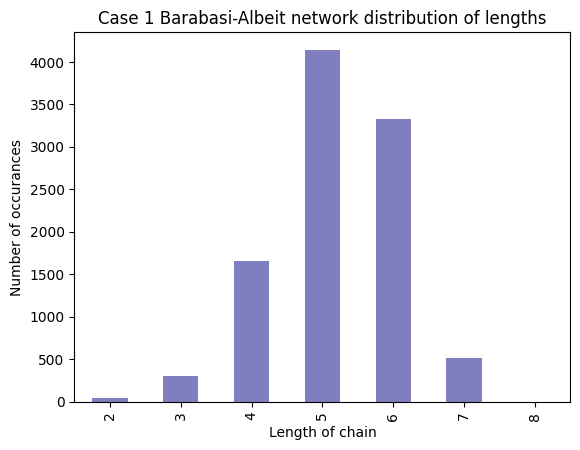

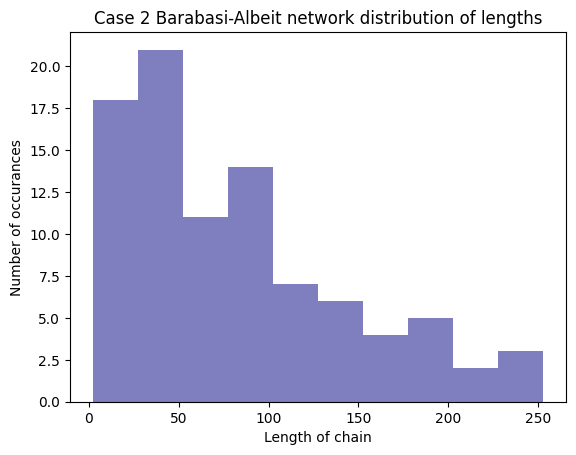

In [37]:
lengths_fin = pd.DataFrame({'Length of finished chains':[len(i) for i in results['']]})
lengths_fin.hist()

KeyError: ignored

<Axes: >

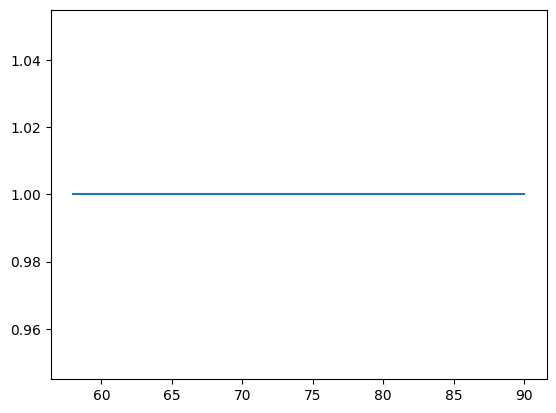

In [38]:
lengths_fin['Length of finished chains'].value_counts().sort_index().plot()

### The same but for n = 100, 10000


In [83]:
lengths_er = []
lengths_ba = []
lengths_ws = []
lengths_er2 = []
lengths_ba2 = []
lengths_ws2 = []
result_ = []
for i in tqdm(range(10)):
  n=10000
  er=nx.erdos_renyi_graph(n,0.05)
  ba=nx.barabasi_albert_graph(n,2)
  ws=nx.watts_strogatz_graph(n,4,0.1)
  randomlist_er = random.sample(range(0, n-1), int(n*0.1))
  randomlist_ba = random.sample(range(0, n-1), int(n*0.1))
  randomlist_ws = random.sample(range(0, n-1), int(n*0.1))
  end_er = randomlist_er.pop()
  end_ba = randomlist_ba.pop()
  end_ws = randomlist_ws.pop()
  print(f"Ids of starting nodes for Possion \n{randomlist_er}, \nId of the destination node {end_er}")
  print(f"Ids of starting nodes for Barabasi-Albeit \n{randomlist_ba}, \nId of the destination node {end_ba}")
  print(f"Ids of starting nodes for Watts-Strogatz \n{randomlist_ws}, \nId of the destination node {end_ws}")

  results = {}
  for randomlist, end, name, er in zip([randomlist_er,randomlist_ba,randomlist_ws],[end_er,end_ba,end_ws],['Poisson','Barabasi-Albeit','Watts-Strogatz'], [er,ba,ws]):
    path = 0
    finished_full = []
    for i in (randomlist):
      finished_full.append(nx.shortest_path(er, source=i, target=end))
      path+= nx.shortest_path_length(er, source=i, target=end)
    results['Case_1_'+name+'_paths'] = finished_full
    results['Case_1_'+name+'_length'] = path/len(randomlist)
  #  print(f'Average path length for chosen nodes in {name} is {path/len(randomlist)}')
  for randomlist, end, name, er in zip([randomlist_er,randomlist_ba,randomlist_ws],[end_er,end_ba,end_ws],['Poisson','Barabasi-Albeit','Watts-Strogatz'], [er,ba,ws]):
    paths = []
    for i in (randomlist):
      visited = []
      while (i != end) and (i !=-1):
        visited.append(i)
        i = choose_next_random([n for n in er[i]], visited)
      if i ==end:
        visited.append(i)
      paths.append(visited)
    finished = [path for path in paths if path[len(path)-1]==end]
    results['Case_2_'+name+'_paths'] = finished
    results['Case_2_'+name+'_length'] = np.average([len(path)-1 for path in paths if path[len(path)-1]==end])
  #  print(f'Average path length for chosen nodes in {name} is {np.average([len(path)-1 for path in paths if path[len(path)-1]==end])}')
    #print(*finished, sep='\n')
  lengths_er.append(results['Case_1_Poisson_length'])
  lengths_ba.append(results['Case_1_Barabasi-Albeit_length'])
  lengths_ws.append(results['Case_1_Watts-Strogatz_length'])
  lengths_er2.append(results['Case_2_Poisson_length'])
  lengths_ba2.append(results['Case_2_Barabasi-Albeit_length'])
  lengths_ws2.append(results['Case_2_Watts-Strogatz_length'])  
  result_.append(results)

  0%|          | 0/10 [00:00<?, ?it/s]

Ids of starting nodes for Possion 
[255, 7934, 5391, 3013, 6745, 8073, 2358, 3851, 8476, 6704, 1338, 5294, 7761, 4638, 6552, 1591, 6442, 3133, 9254, 2560, 8254, 3603, 5624, 6719, 4244, 2339, 4151, 5987, 6073, 8225, 5967, 3486, 8879, 8287, 476, 9081, 8738, 5470, 4115, 1912, 8475, 4492, 3559, 6060, 4784, 4129, 3712, 9505, 9052, 1159, 7757, 5857, 7585, 8594, 3581, 1553, 3263, 1292, 4984, 2864, 1949, 153, 9983, 5402, 3052, 2942, 7259, 3268, 7767, 2045, 1537, 9639, 9687, 1819, 5272, 8851, 1070, 9814, 141, 9735, 9550, 7760, 6707, 692, 2201, 3420, 3837, 5906, 1803, 241, 9063, 3088, 116, 3213, 3499, 9959, 5269, 264, 2945, 7105, 1450, 4625, 3889, 8199, 9452, 4912, 1727, 7340, 4183, 8511, 9282, 1440, 3283, 5338, 7284, 6914, 5826, 7255, 8595, 646, 3506, 1040, 1284, 2628, 5471, 3652, 4255, 4228, 1480, 6221, 9125, 5023, 4011, 6373, 1922, 1304, 7108, 5349, 6581, 3264, 4342, 5891, 5930, 266, 7647, 3710, 8147, 7099, 4499, 6716, 5159, 9752, 9585, 3100, 4454, 7648, 975, 7516, 2138, 5831, 5952, 43, 4917,

In [59]:
lengths_ustal = []
for j in range(10):
  lengths_ustal +=[len(i)-1 for i in result_[j]['Case_1_Barabasi-Albeit_paths']]
lengths_fin = pd.DataFrame({'Length of finished chains':lengths_ustal})

lengths_fin['Length of finished chains'].value_counts().sort_index().plot(kind="bar", colormap='jet', alpha = 0.5,
         title='Case 1 Barabasi-Albeit network distribution of lengths')
plt.xlabel('Length of chain')
plt.ylabel('Number of occurances')
plt.show()

[2.0202020202020203,
 1.97979797979798,
 1.9696969696969697,
 1.9292929292929293,
 1.9494949494949494,
 2.0606060606060606,
 2.0606060606060606,
 2.01010101010101,
 2.01010101010101,
 2.01010101010101]

In [ ]:
lengths_ustal = []
for j in range(10):
  lengths_ustal +=[len(i)-1 for i in result_[j]['Case_2_Barabasi-Albeit_paths']]
lengths_fin = pd.DataFrame({'Length of finished chains':lengths_ustal})

lengths_fin['Length of finished chains'].plot(kind="hist", colormap='jet', alpha = 0.5,
         title='Case 2 Barabasi-Albeit network distribution of lengths')
plt.xlabel('Length of chain')
plt.ylabel('Number of occurances')
plt.show()

In [86]:
fin_table = pd.DataFrame({'Network_type': ['Poisson 10000 nodes, 0.05 probability', 'Barabasi-Albert 10000 nodes', 'Watts-Strogatz 10000 nodes, 4 nns, 0.1 pr'],'Case 1 Chain Length':[np.average(lengths_er), np.average(lengths_ba), np.average(lengths_ws)],'Case 2 Chain Length':[np.nanmean(lengths_er2), np.nanmean(lengths_ba2), np.nanmean(lengths_ws2)]})
fin_table = fin_table.round(2)
pd.DataFrame.from_dict(fin_table).to_excel('Experiment_results_10000_nodes.xlsx')
fin_table

,Network_type,Case 1 Chain Length,Case 2 Chain Length
0,"Poisson 10000 nodes, 0.05 probability",1.95,43.27
1,Barabasi-Albert 10000 nodes,5.20,82.92
2,"Watts-Strogatz 10000 nodes, 4 nns, 0.1 pr",12.78,34.48


In [86]:
lengths_er2

[17.0]

# Milgram's Results

In [75]:
from scipy.stats import t

In [76]:
a = [1 for _ in range(2)]+[2 for _ in range(3)]+[3 for _ in range(8)]+[4 for _ in range(14)]+[5 for _ in range(8)]+[6 for _ in range(16)]+[7 for _ in range(6)]+[8 for _ in range(2)]+[9 for _ in range(2)]+[10 for _ in range(3)]
len(a)

64

In [77]:
np.mean(a)

5.15625

In [79]:
a = np.array(a)
m = a.mean() 
s = a.std() 
dof = len(a)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(a)), m+s*t_crit/np.sqrt(len(a))) 

(4.6446728736171226, 5.6678271263828774)